# Exercise Data Visualization Basic

Source dataset: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Jika ingin menjalankan notebook di Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
# Gunakan path yang sudah disediakan jika menjalankan notebook di Google Colab
df = pd.read_csv('melb_data.csv')
# Jika menjalankan notebook di local (Jupyter Notebook/VS Code), gunakan path sendiri sesuai dengan lokasi download file
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## No. 1
1. Buatlah Histogram untuk menampilkan distribusi data harga rumah (kolom “Price”)!
2. Tambahkan judul “Distribusi Harga Rumah” berukuran 15!
3. Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

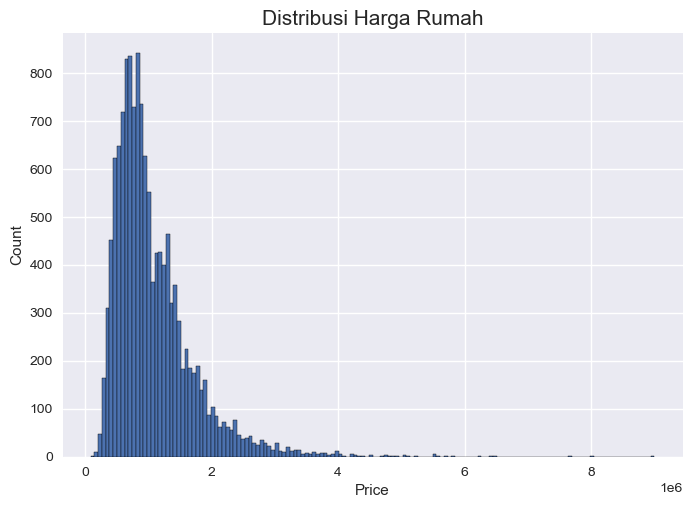

In [ ]:
plt.hist(df['Price'], bins=150, edgecolor='black')  # bins bisa disesuaikan sesuai kebutuhan
plt.title('Distribusi Harga Rumah', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

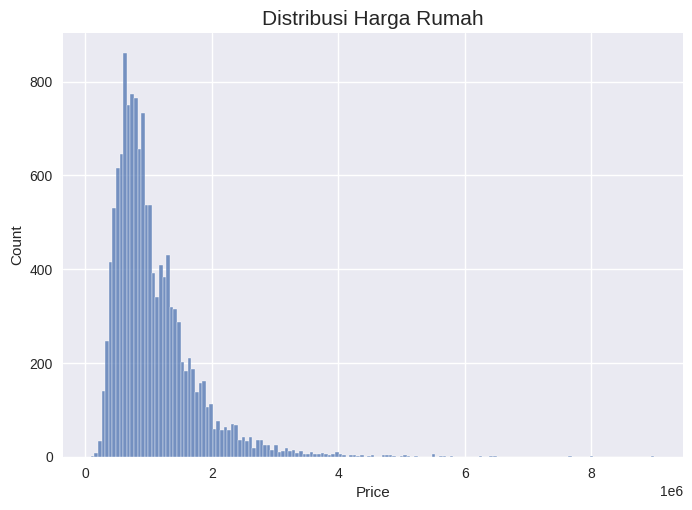

In [ ]:
# No 1

## No. 2
1. Buatlah Box Plot untuk menampilkan distribusi data jarak ke CBD (kolom “Distance”)!
2. Buatlah Box Plot “Distance” untuk tiap nama region (kolom “Regionname”)!
3. Tambahkan judul ‘Distribusi Jarak ke CBD berdasarkan Nama Region’ berukuran 15!
4. Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

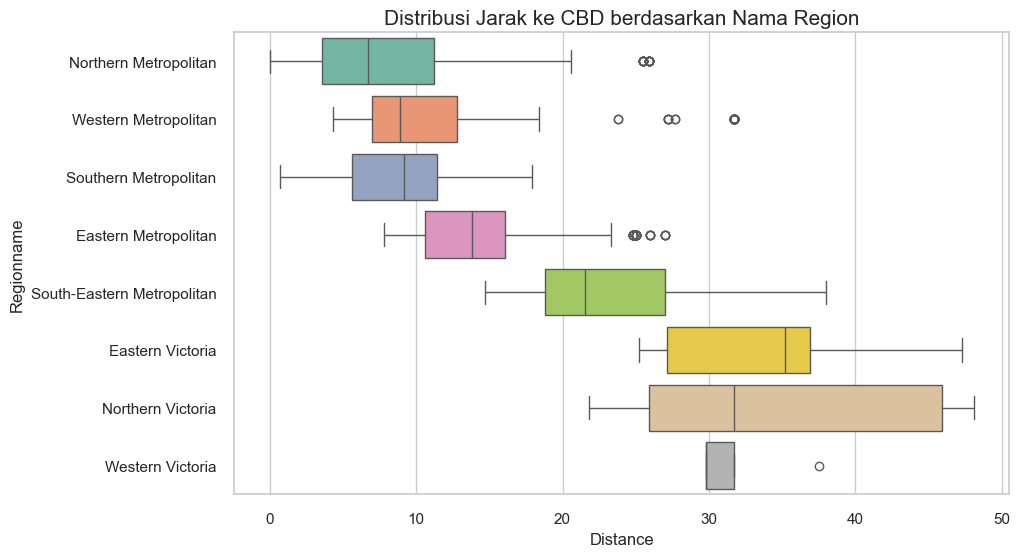

In [ ]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x='Distance', y='Regionname', palette='Set2')

plt.title('Distribusi Jarak ke CBD berdasarkan Nama Region', fontsize=15)
plt.xlabel('Distance')
plt.ylabel('Regionname')

plt.show()


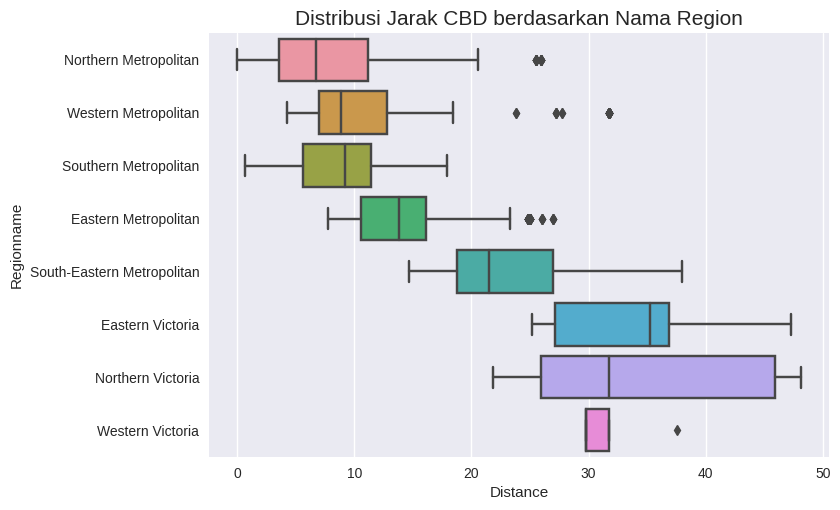

In [ ]:
# No 2

## No. 3

1. Buatlah Bar Plot (diagram batang) untuk membandingkan nilai median harga
rumah (kolom “Price”) di tiap tipe rumah (kolom “Type”)!
2. Tambahkan judul ‘Perbandingan Nilai Median Harga Rumah’ berukuran 15!
3. Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

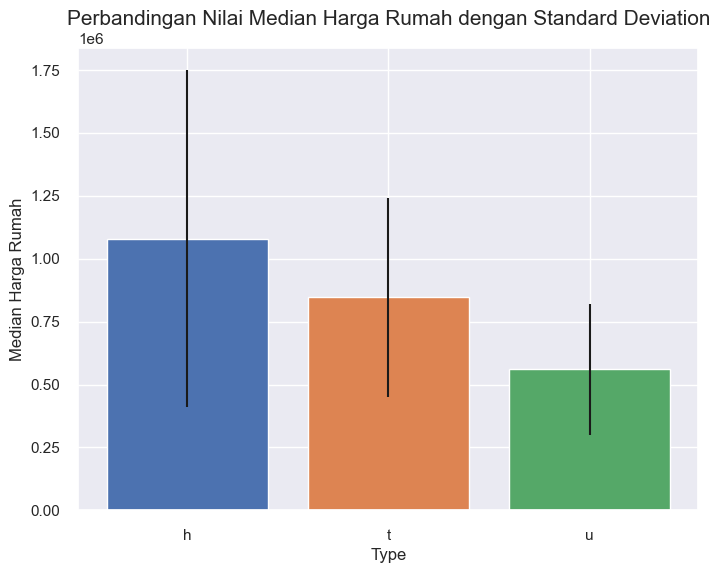

In [ ]:
# Hitung median dan variance harga berdasarkan tipe rumah
df_grouped = df.groupby('Type')['Price'].agg(['median', 'var']).reset_index()

# Hitung standard deviation (akar kuadrat dari variance)
df_grouped['std'] = np.sqrt(df_grouped['var'])

sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6))

# Membuat barplot dengan error bars (standard deviation)
plt.bar(
    x=df_grouped['Type'],
    height=df_grouped['median'],
    yerr=df_grouped['std'],
    color=sns.color_palette('deep'),
    capsize=10  # Ukuran "topi" error bar
)

plt.title('Perbandingan Nilai Median Harga Rumah dengan Standard Deviation', fontsize=15)
plt.xlabel('Type')
plt.ylabel('Median Harga Rumah')

plt.show()


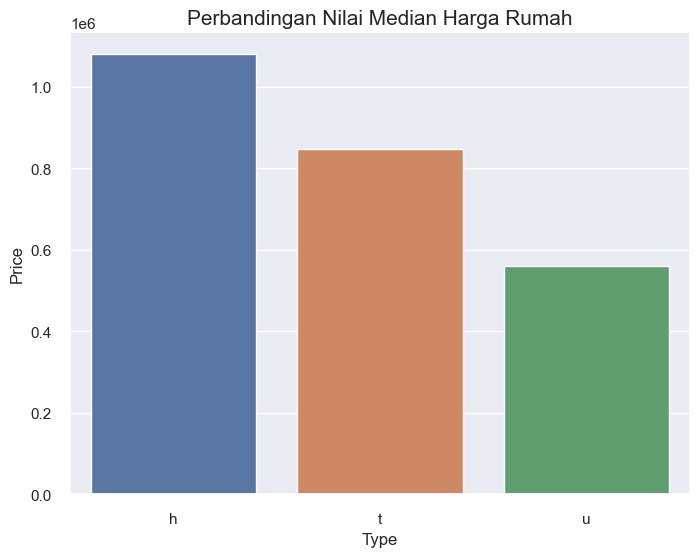

In [ ]:
df_median = df.groupby('Type', as_index=False)['Price'].median()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6))

sns.barplot(
    data=df_median,
    x='Type',
    y='Price',
    palette='deep'  
)

plt.title('Perbandingan Nilai Median Harga Rumah', fontsize=15)
plt.xlabel('Type')
plt.ylabel('Price')

plt.show()

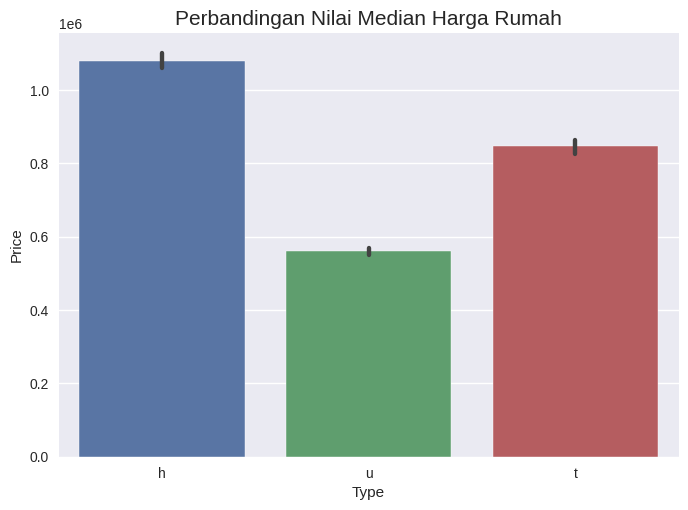

In [ ]:
# No 3

## No. 4

1. Buatlah Scatter Plot (diagram titik) untuk menampilkan korelasi antara harga rumah (kolom “Price”) dengan Jarak ke CBD (kolom “Distance”)!
2. Bedakan warna titik berdasarkan tipe rumah (kolom “Type”)!
3. Tambahkan judul ‘Korelasi Harga Rumah dan Jarak Rumah ke CBD’ berukuran 15!
4. Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

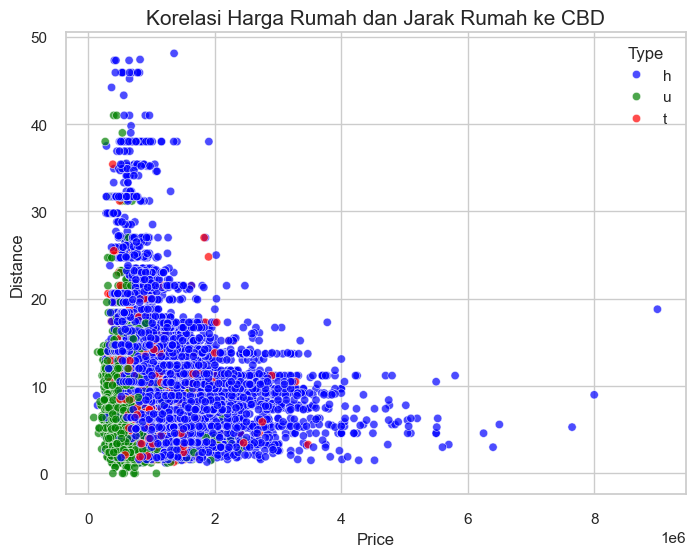

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Price',
    y='Distance',
    hue='Type',              # membedakan warna berdasarkan kolom 'Type'
    palette=['blue','green','red'],  # contoh palet manual
    alpha=0.7               # mengatur transparansi titik (opsional)
)
plt.title('Korelasi Harga Rumah dan Jarak Rumah ke CBD', fontsize=15)
plt.xlabel('Price')
plt.ylabel('Distance')
plt.show()


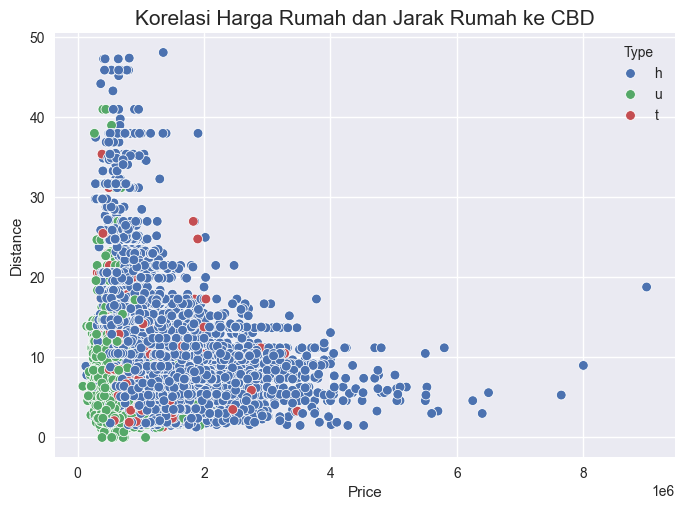

## No. 5

1. Konversi kolom “Date” menjadi tipe data datetime64. Buatlah kolom baru bernama ‘Month’ hasil ekstraksi data bulan dari kolom “Date”!
2. Buatlah Line Plot (diagram garis) untuk menampilkan tren perkembangan harga rumah (kolom “Price”) tiap bulan!
3. Bedakan warna garis berdasarkan tipe rumah (kolom “Type”)!
4. Tambahkan judul ‘Tren Harga Rumah per Bulan berdasarkan Tipe Rumah’ berukuran 15!
5. Tidak ada ketentuan pilihan ukuran dan library yang digunakan.

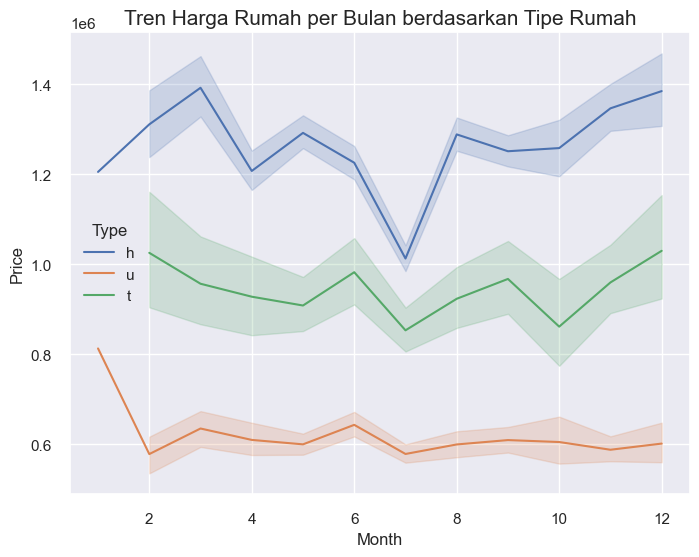

In [ ]:
df = pd.read_csv('melb_data.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Month'] = df['Date'].dt.month

sns.set(style="darkgrid")

plt.figure(figsize=(8, 6))  
sns.lineplot(x='Month', y='Price', hue='Type', data=df)

plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah', fontsize=15)
plt.show()

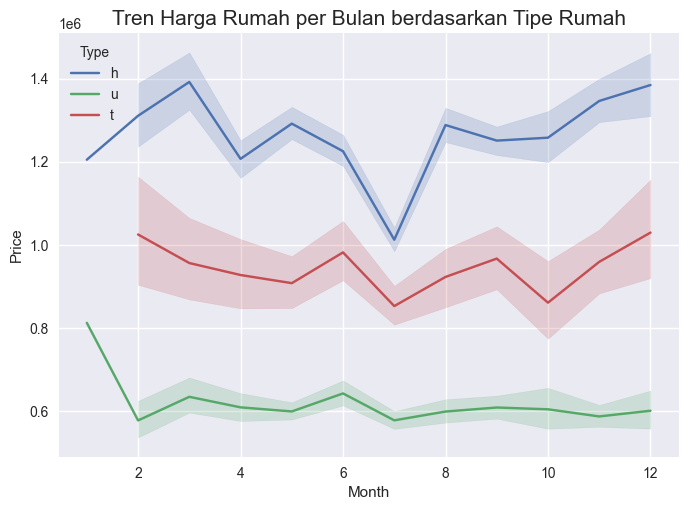

## No. 6

1. Kelompokkan total luas tanah (kolom “Landsize”) berdasarkan region (kolom “Regionname”), lalu simpan ke dalam sebuah DataFrame baru!
2. Dari DataFrame baru tersebut, buatlah Pie Chart (diagram lingkaran) untuk menampilkan proporsi total luas tanah di tiap region!
3. Tambahkan explode agar potongan diagram seakan terpisah!
4. Tambahkan judul ‘Proporsi Luas Tanah tiap Region’ berukuran 20!
5. Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

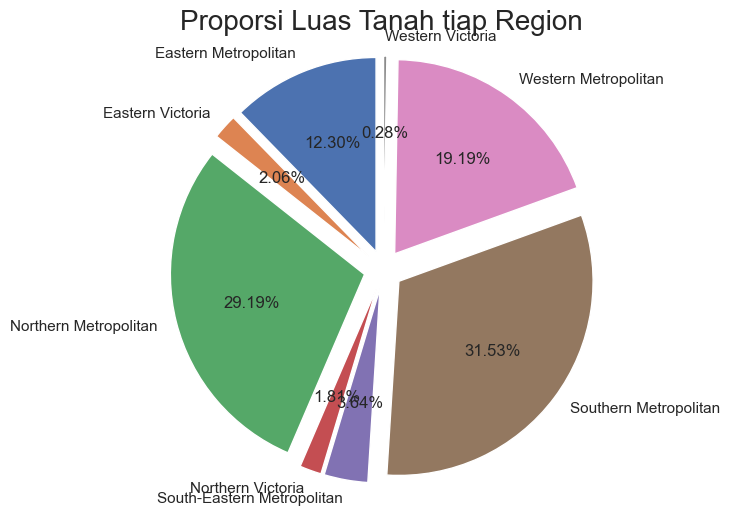

In [ ]:
landsize_by_region = df.groupby('Regionname')['Landsize'].sum()
df_landsize_region = pd.DataFrame({'Total Landsize': landsize_by_region})

plt.figure(figsize=(6, 6))  

explode = [0.1] * len(df_landsize_region)

plt.pie(df_landsize_region['Total Landsize'],
        labels=df_landsize_region.index,
        autopct='%1.2f%%',  
        startangle=90, 
        explode=explode, 
        shadow=False)  

plt.title('Proporsi Luas Tanah tiap Region', fontsize=20)

plt.axis('equal')

plt.show()


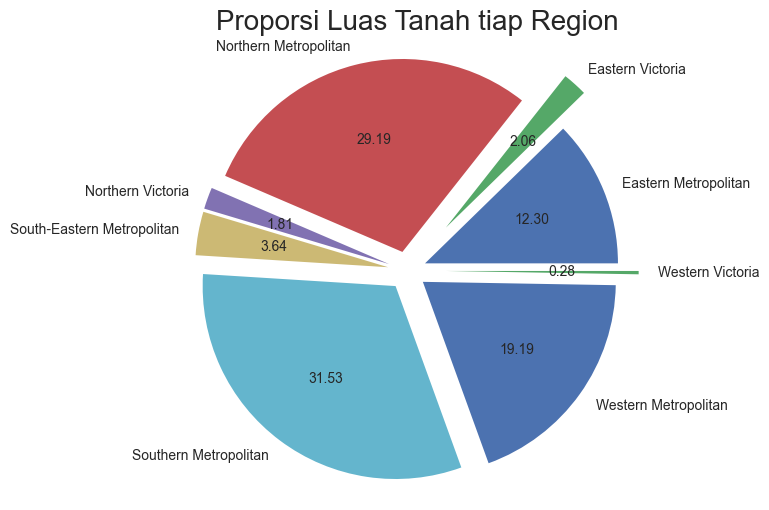

## No. 7

1. Buatlah terlebih dahulu correlation matrix yang berisi korelasi kolom “Price”, “Distance”, “Landsize”, dan “Rooms”!
2. Dari correlation matrix ini, buatlah Correlation Heatmap untuk memvisualisasikan korelasi antar variabel!
3. Tampilkan data korelasi di heatmap (annot = True) !
4. Tambahkan judul ‘Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar’ berukuran 20!
5. Tidak ada ketentuan pilihan warna, ukuran, dan library yang digunakan.

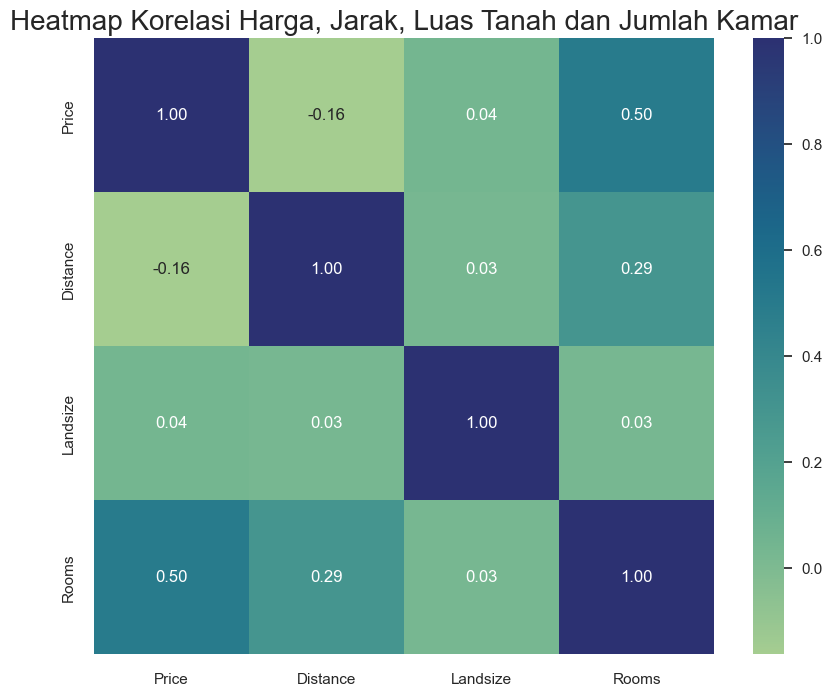

In [ ]:
kolom = ['Price', 'Distance', 'Landsize', 'Rooms']
df_kolom = df[kolom]

correlation_matrix = df_kolom.corr()

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")

plt.title('Heatmap Korelasi Harga, Jarak, Luas Tanah dan Jumlah Kamar', fontsize=20)
plt.show()


## No. 8

1. Urutkan data berdasarkan harga (kolom “Price”) dan tampilkan 10 data dari harga rumah tertinggi, kemudian simpan hasilnya ke dalam DataFrame baru!
2. Buatlah peta Melbourne yang berlokasi di [-37.8136, 144.9631] dan zoom_start = 11!
3. Di dalam peta Melbourne, tambahkan 10 marker sesuai lokasi 10 rumah dengan harga tertinggi!
4. Di dalam marker, popup berisi harga rumah dan tooltip berisi alamat rumah.